# Introduction to Python for Earth Scientists

These notebooks have been developed by Calum Chamberlain, Finnigan Illsley-Kemp and John Townend at [Victoria University of Wellington-Te Herenga Waka](https://www.wgtn.ac.nz) for use by Earth Science graduate students. 

The notebooks cover material that we think will be of particular benefit to those students with little or no previous experience of computer-based data analysis. We presume very little background in command-line or code-based computing, and have compiled this material with an emphasis on general tasks that a grad student might encounter on a daily basis. 

In 2021, this material will be delivered at the start of Trimester 1 in conjunction with [ESCI451 Active Earth](https://www.wgtn.ac.nz/courses/esci/451/2021/offering?crn=32176). Space and pandemic alert levels permitting, interested students not enrolled in ESCI451 are encouraged to come along too but please contact Calum, Finn, or John first.


| Notebook | Contents | Data |
| --- | --- | --- |
| [1A](ESCI451_Module_1A.ipynb) | Introduction to programming, Python, and Jupyter notebooks | - |
| **[1B](ESCI451_Module_1B.ipynb)** | **Basic data types and variables, getting data, and plotting with Matplotlib** | **Geodetic positions** |
| [2A](ESCI451_Module_2A.ipynb) | Logic, more complex plotting, introduction to Numpy | Geodetic positions; DFDP-2B temperatures |
| [2B](ESCI451_Module_2B.ipynb) | Using Pandas to load, peruse and plot data | Earthquake catalogue  |
| [3A](ESCI451_Module_3A.ipynb) | Working with Pandas dataframes | Geochemical data set; earthquake catalogue |
| [3B](ESCI451_Module_3B.ipynb) | Simple time series analysis using Pandas | Historical temperature records |
| [4A](ESCI451_Module_4A.ipynb) | Making maps with Cartopy | Earthquake catalogue |
| [4B](ESCI451_Module_4B.ipynb) | Working with gridded data | DEMs and Ashfall data |


The content may change in response to students' questions or current events. Each of the four modules has been designed to take about three hours, with a short break between each of the two parts.

# This notebook

1. Some essential Python terminology
   - Data types
   - Variables
   - Good ideas for naming variables
   - Comments
   - Manipulating strings and lists
   - Dictionaries
2. A first go at downloading and plotting data
   - Getting data with a function
   - Plotting it with Matplotlib
   - Labelling and saving figures


# Some essential Python terminology

## Data types

We said that `"Hello World!"` was a string (known as `str` in Python, there are a few other data types that you should know about 
(there are others that we don't need to worry about yet):

- `int`: For storing integers, like 1, 4, 999, -2000
- `float`: For storing floating-point numbers, like 1.2, -37.473, 42.424242424242 - there is a limit to the precision!
- `list`: For storing lists of other objects, written using square-brackets, e.g.: `[1, 2, "alfred", 3.2]`, note 
   that any other data type can be within a list, including another list. The order that you put things into
   a `list` is retained.
- `set`: Another data type for storing other objects, but this time only unique elements are stored, and order
  is not guaranteed. `Set`s are written using curly-brackets, e.g: `{1, 2, "alfred", 3.2}`. These can be really
  useful for getting a unique set of *things*.
- `dict`: A further data type for storing other objects.  In a `dict` (short for dictionary), *values* are stored
  associated with some *key* in key: value pairs (e.g. {key: value}).  This is really useful for keeping track of attributes, for example you might have a dictionary to store the attributes associated with an observation like:
  `rock = {"type": "andesite", "age": "10", "comment": "Tastes like fish"}`
  
`print` will take any of these types, convert it to a `str` and print it to screen:

In [1]:
print(1)

1


In [2]:
print(43.4242)

43.4242


In [3]:
print([1, 2, "alfred"])

[1, 2, 'alfred']


In [4]:
# NBVAL_IGNORE_OUTPUT
print({1, 2, "alfred"})

{1, 2, 'alfred'}


In [5]:
print({1, 2, 6, 2, 1})

{1, 2, 6}


Notice that the final print only printed the unique elements of the `set` - only those attributes are stored.

In [6]:
rock = {"type": "andesite", "age": "10", "comment": "Tastes like fish"}
print(rock)

{'type': 'andesite', 'age': '10', 'comment': 'Tastes like fish'}


## Variables

Programming languages keep track of values using variables. You (the programmer) assign some name to a value, and the computer keeps track of this value in memory.  You can then use this variable later in your code, e.g. you can
do some maths! The symbols for doing mathematical operations are:

- `+` addition
- `-` subtraction
- `*` multiplication
- `/` division
- `**` exponentation

Note that division will always return a `float` in Python 3.x.

In [7]:
a = 5
b = 12
c = a + b
print(c)

17


You can also change the value of a variable *in-place* using the following symbols:

- `+=` addition in-place
- `-=` subtraction in-place
- `*=` multiplication in-place
- `/=` division in-place
- `**=` exponentiation in-place

In [8]:
d = 5
d += 3
print(d)

8


In [9]:
d /= 3
print(d)

2.6666666666666665


In [10]:
d **= 3
print(d)

18.96296296296296


Note that if you run the above cell again, without re-running from when we first defined d, you will get a different returned value. **Watch out when working in-place on data!**

**Exercise:** Now it is your turn. Do some maths! 

For a seismic station recording at 100 Hz (100 samples per second), work out how many samples are recorded per day, then convert this to GB assuming that each sample is stored as an `int`.

We can work out how much memory is used by an `int` in Python by running `sys.getsizeof(int())`.

In [11]:
import sys

sys.getsizeof(int())

24

In [12]:
# Your maths here! Check notebook 1 for some hints on how many seconds are in a day...

**Exercise:** Use Python as a calculator - what is the answer to this:
\begin{equation}
    \frac{(a \times b)^c}{d - e}
\end{equation}
where 
- a is 24, 
- b is 42, 
- c is 3, 
- d is 10 and 
- e is 15

*The Answer is: -204838502.4*

In [13]:
# Your answer here

## Good ideas for naming variables

You should always give your variables useful names. Python doesn't demand this, but it does allow it. You should write
your code so that you (both now and in ten years time, as well as other people) can understand it; as 
[Martin Fowler](https://en.wikiquote.org/wiki/Martin_Fowler) wrote:

> Any fool can write code that a computer can understand. Good programmers write code that humans can understand.

Hopefully you will note that variable names `a`, `b`, `c`, ... are crap names for variables! Try to use simple
but expressive names, e.g. if you have a list of different volcano names, don't call that variable `vn`, nor
should you call it `volcano_names_used_in_this_code_with_effusive_eruptions`; just call it `volcano_names`.
*If* you need to get into more detail, maybe you should be using more complex data-types, like `dict`s. We will
play with some of these later.

## Comments

Ideally you will write code with useful variable names and obvious logic so that you can read an understand your
programs as if they were prose. When you find that it is a little harder to understand, you should add comments.

Comments are text in your program that are not executed (run), and are just there to help the reader understand
what is going on. While you are learning they can be really handy, and people often start code as a series of
comments that they then convert into code.

Comments in Python start with a `#` character, e.g.:

In [14]:
# Total volume of material in cubic km
volume_ejected_in_units_Z_through_W = [0.1, 35.0, 0.8, 0.05]
# sum is a Python function over any iterable
total_volume = sum(volume_ejected_in_units_Z_through_W)
print(f"Total volume ejected: {total_volume} km^3")
# len tells you how long an object is
n_events = len(volume_ejected_in_units_Z_through_W)
average_volume = total_volume / n_events
print(f"Average volume per-event: {average_volume} km^3")

Total volume ejected: 35.949999999999996 km^3
Average volume per-event: 8.987499999999999 km^3


Those values look silly, so lets just print them to two decimal places.

You can format floating point numbers in your format string using syntax like:
```python
print(f"This is a big number: {big_number:.2f}")
```
where the `:.2f` specifies to round a `float` 2 decimal places.  You can change the number (`2`) to get different number of decimal places.

In [15]:
print(f"Total volume ejected: {total_volume:.2f} km^3")
print(f"Average volume per-event: {average_volume:.2f} km^3")

Total volume ejected: 35.95 km^3
Average volume per-event: 8.99 km^3


## String manipulation

The above example illustrates one way in which strings can be printed. We can do all sorts of fun things with strings, such as adding them together (or, more precisely, "concatenating" them):

In [16]:
sentence_start = "Monty Python and the "
sentence_end = "Holy Grail"
sentence = sentence_start + sentence_end
print(sentence)

Monty Python and the Holy Grail


Or we can make a list of them and join them together with another string in between:

In [17]:
sentence = "Un-".join([sentence_start, sentence_end])
print(sentence)

Monty Python and the Un-Holy Grail


We can operate in-place on strings as well:

In [18]:
sentence = sentence_start
sentence += sentence_end
print(sentence)

Monty Python and the Holy Grail


We can make new strings using *format* strings, like we did in the example above. Here we start a string with an `f`, then open
quotes to mark the start of a string. Within this, any plain text is interpreted to be a string. Anything within curly
brackets (`{}`) is interpreted as a variable name and converted to a string.

In [19]:
sentence = f"{sentence_start}{sentence_end} is a rather amusing film"
print(sentence)

Monty Python and the Holy Grail is a rather amusing film


There is lots more that you can do with format strings that we don't need to go into yet, but you can find out more
[in the Python docs](https://docs.python.org/3.6/reference/lexical_analysis.html#f-strings).

## List manipulation

Each element of a list can be accessed by its index. In Python, the first element in a list is at
index `0`.  This may seem unnecessarily complicated (it is), but you get used to it - and you do need to remember this convention, which differs from some other languages which start at `1`.
(The reason for this is to do with the byte-offset from the start of the memory-block containing the list, ... but
you don't need to know that and its best to just let the hard-core Python zealots fight over it amongst  themselves.)

In any case, say we have a list of 10 elements, indexed as follows:

```python
some_list = [1, 9, 3, 26, 7, 9, 42, 99, 1000, -2]
# indexes:   0  1  2   3  4  5   6   7     8   9
```

You can also specify the index as the position from the end, in this case, the equivalent indexes are:

```python
some_list = [1, 9, 3, 26, 7, 9, 42, 99, 1000, -2]
# indexes: -10 -9 -8  -7 -6 -5  -4  -3    -2  -1
```

Lets have a go at manipulating some lists based on their indexes, we will use the `"Monty Python and the Holy Grail"` example again.

In [20]:
sentence = "Monty Python and the Holy Grail"

We can split a string based on any character to get a list of strings:

In [21]:
words = sentence.split(" ")
print(words)

['Monty', 'Python', 'and', 'the', 'Holy', 'Grail']


We can re-arange by making new lists from parts of the original list

In [22]:
sense = [words[-2], words[0]]
print(sense)

['Holy', 'Monty']


We can add parts of a list together to get a new thing:

In [23]:
nonsense = words[-1] + words[2]
print(nonsense)

Grailand


We can take chunks of the list by *slicing* using the syntax `slicable_object[start:end]` where `start` and `end` are the first and last (+1) indexes we want to access, e.g. we get everything `start <= things < end`:

In [24]:
first_three_words = words[0:3]
print(first_three_words)

['Monty', 'Python', 'and']


We can append values to a list:

In [25]:
first_three_words.append("the")
print(first_three_words)

['Monty', 'Python', 'and', 'the']


And we can add lists together (both in-place and not):

In [26]:
first_three_words += ["unruly", "albatross"]
print(first_three_words)

['Monty', 'Python', 'and', 'the', 'unruly', 'albatross']


## Exercise:

Take the following sentence and reverse the order of the words (without using the [`.reverse()` method](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists), which would be best).  This will be easier with loops once we introduce them in the next notebook...

In [27]:
sentence = "Once upon a time in the West"

In [28]:
# Your answer here:

## Dictionary lookups

Finding attributes within a dictionary, if you know the key, is very fast.  Accessing attributes by key is similar to
indexing lists, but instead of providing an index in the square brackets, you provide the key:

In [29]:
rock = {"type": "andesite", "age": "10", "comment": "Tastes like fish"}

print(rock["type"])

andesite


In [30]:
print(rock["comment"])

Tastes like fish


We will use dictionaries quite a bit in these modules because they can be really helpful for keeping track of data.

## Functions

In a moment we are going to look at and use a function to get some data, so I wanted to take a moment to introduce the concept.  We will spend more time on this in the next notebook.

A core principle of programming is **"Don't Repeat Yourself"** (AKA DRY). One way to avoid repeating yourself is to write *functions*. Functions define a set block of code that takes some input and does something with it. Functions often return something, but they don't have to (they don't even need to take any input!).

In general, if you write some code that you might want to use more than once, you should make it into a function. The main reasons for this are:
1. to reduce your effort (let the machine do the work!), and
2. Reduce the risk of doing it wrong! Write it once, write it well and fix any bugs in that one bit of code!

Writing functions in Python is nice and easy. The syntax for this is:

```python
def function_name(arguments):
    your_code_here
    return output

more_code_here  # This isn't part of the function!
```

The `def` and `return` are keywords that Python understands as the start and end of a function. You don't need the `return` if you do not want to return anything from the function.  The whitespace (four spaces!) defines what content is within the function. You also need the brackets after `function_name` (you can call the function whatever you want - remember variable naming and name functions helpfully!) and the colon at the end of the brackets.

---

# Getting started with some data

Now we know something about the basic datatypes in Python, lets play with some Geoscience data.

We will produce a plot of some GNSS displacement data from NZ. The adage _a picture is worth a thousand words_ is very true in the world of science (but not so true that it changes your thesis word-count!).

A good figure that clearly articulates your data will make your work much easier to understand. Simple is good, but your figures still need to cover the basics of being well-labeled and accurate. Plots are also extremely useful when exploring your data - quickly plotting a few lines and seeing whether they look "right" can save you all sorts of tedious work working out where you went wrong.

Frequently you will want to make the same, or a very similar plot multiple times. You could do this interactively in a spreadsheet, wasting your life away, making mistakes... (remember DRY), or you could write a little program to make your plots for you!

In Python, the main plotting package is `matplotlib`. In this notebook we will introduce some of the basics of data plotting, using some New Zealand GNSS (Global Navigation Satellite System) data from GeoNet.

To make our plots work in the section, and be interactive we will use the matplotlib widget (see below). We'll be spending lots more time on different aspects of this process in the later modules, so for the time being some of the Python code may seem a bit intimidating. Here's a simple overview of the steps we're taking:

1. Download some data from GeoNet using a function
2. Take a quick look at the data to understand what we have
3. Plot and annotate the data in a variety of ways using `matplotlib`.

## Getting some data

We will first write a function to get the data we want from GeoNet.  We have adapted this from the
[GeoNet tutorial](https://github.com/GeoNet/data-tutorials/blob/master/GNSS_Data/Python/Introduction_to_GNSS_data_using_FITS_in_Python.ipynb). This may seem a bit overwhelming, if you're not familiar with Python or programming yet, but the key points to remember are these:

1. The function we're defining, ``get_gnss_for_station()``, encodes a sequence of steps that enable us to automate the process of downloading a specific set of data from a specific source; here, the source is GeoNet
2. The block of text in red at the start of the function provides an explanation of what the function does, what inputs it expects, and what outputs it returns
3. Once this function is defined, we can use it time and time again - and we don't need to know what it looks like inside.
4. In other words, you can skip right over the next block if you like.

In [31]:
import requests  # This helps with web-requests
import datetime  # Python's representation of dates and times.

# The following block of code defines a function that we can use
# as often as we like to get GNSS data for a particular station


def get_gnss_for_station(
        station: str,
        fits_url: str = "http://fits.geonet.org.nz/observation",) -> dict:
    """
    Get GNSS data from GeoNet for the station

    Parameters
    ----------
    station
        The name of the station you want to get data for
    fits_url
        URL of the FITS data service you want to query.

    Returns
    -------
    Dictionary with keys:
        time 
            list of timestamps of observations
        north
            list of offsets in mm in the north direction
        east
            list of offsets in mm in the east direction
        up          
            list of vertical offsets in mm
        north_error
            list of errors in mm for north
        east_error
            list of errors in mm for east
        up_error
            list of erros in mm for up

    """
    # Initialise an empty dictionary that we will append to
    out = dict(time=[],
               north=[],
               east=[],
               up=[],
               north_error=[],
               east_error=[],
               up_error=[])
    for channel in {"north", "east", "up"}:
        parameters = {"typeID": channel[0], "siteID": station}
        response = requests.get(fits_url, params=parameters)
        assert response.status_code == 200, "Bad request"
        payload = response.content.decode("utf-8").split("\n")
        # payload is a csv with header
        # This is a list-comprehension, a type of fast, one-line for loop
        payload = [p.split(',') for p in payload]
        # Check that this is what we expect
        assert payload[0][0] == 'date-time', "Unkown format"
        assert len(payload[0]) == 3, "Unknown format"
        times, displacements, errors = zip(*[
            (datetime.datetime.strptime(p[0], '%Y-%m-%dT%H:%M:%S.%fZ'),
             float(p[1]), float(p[2])) for p in payload[1:-1]])
        if len(out["time"]) == 0:
            out.update({"time": times})
        else:
            assert out["time"] == times, "Different time sampling for different components."
        out.update({channel: displacements, f"{channel}_error": errors})
    return out

Right, now we have a way to get some data, lets get some and plot it!

We will grab the data from station [PYGR](https://www.geonet.org.nz/data/network/mark/PYGR), because
it is in a cool place (Puysegur, in Fiordland) near the plate boundary. We are storing the data in a dictionary called `pygr_data`. In a later notebook we'll look an alternative method of storing the data, known as a dataframe, which provides a lot of extra functionality and convenience.

In [32]:
pygr_data = get_gnss_for_station(station="PYGR")
n_samples = len(pygr_data["time"])
print(f"We have downloaded {n_samples} samples of data")

We have downloaded 5331 samples of data


## Plotting the data with Matplotlib

The main Matplotlib objects that we will interface with are the `Figure` and `Axes` objects. A `Figure` contains all the plots (think of it like a page).  Each plot is an `Axes` object and this is where the plotting actually happens.

A simple way to start a `matplotlib` plot is to use the `plt.subplots()` function to generate a new `Figure` and `Axes` object.  In a later notebook we will look at more sophisticated methods that enable us to combine multiple plots in a single figure.

Figure(432x288)
AxesSubplot(0.125,0.125;0.775x0.755)


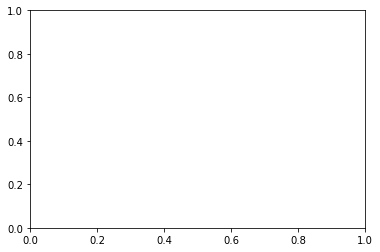

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
print(fig)
print(ax)
plt.show()

This simple figure just consists of some axes.  The next few commands plot some actual data using those axes. We will use the `"times"` as our x-values.

In [34]:
ax.plot(pygr_data["time"], pygr_data["north"])
plt.show()

There's a big jump in the data! Bonus points for the first one to shout-out what this is... Note that you should be able to zoom into the plot by clicking the square button on the left and selecting a zoom window.

This graph is okay, but it doesn't have any labels! What are we plotting!? No-one will ever know.

## Labeling

Lets fix that...

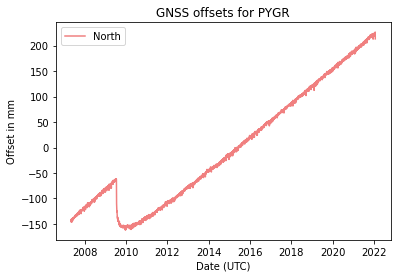

In [35]:
fig, ax = plt.subplots()
ax.plot(pygr_data["time"], pygr_data["north"],
        label="North", color='lightcoral')
ax.set_xlabel("Date (UTC)")
ax.set_ylabel("Offset in mm")
ax.set_title("GNSS offsets for PYGR")
ax.legend()
plt.show()

So what did we do here?

1. We added a `label` argument to the call to plot, which attaches a `str` label to our data, and then later made a call to `ax.legend()` to use this label in making the legend;
2. We added a label to the x-axis using `ax.set_xlabel`
3. Similarly, we added a label to the y-axis using `ax.set_ylabel`
4. We added a useful title using `ax.set_title`
5. We added a legend - this comes in useful when plotting multiple data on the same graph...

## Saving plots

So you made a lovely wee plot... Now what? Screenshot? Crikey no!

There is that useful little save button on the plots here that let you save your figure, but that's no help if you are making a few hundred figures, you don't want to be clicking a save button for every figure. That's just silly.

To save figures programmatically we can use a simple bit of syntax:
```python
fig.savefig("my_figure.png")
```
matplotlib knows common file-types for images, so just specifying the file extension means matplotlib will save as that figure type. Win. Some common extensions that you might use are:
- `.png` good for rasterised figures
- `.jpg` good for internet figures
- `.svg` (scalar vector graphics) good if you want to edit your figure later using something like [inkscape](https://inkscape.org/)
- `.pdf` handy, text retained as $L^aT_eX$ text.

Let's save our figure as a png, you can open it and have a look at it if you want.